<h2 style="text-align:center">KREDİ KARTI MÜŞTERİ KAYBI TAHMİNİ</h2>

<img src="https://i.hizliresim.com/7gryx4d.jpg">

In [1]:
#gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np # kullanmamışım
import matplotlib.pyplot as plt
import seaborn as sns

from random import randrange
from random import random
from math import exp
from sklearn.preprocessing import LabelEncoder

In [3]:
#adresi verilien csv formatlı veri setinin okunması
#head() fonksiyonu ilk 5 satırı listelenmesini sağlar, aldığı parametre ile istediği sayıda satır yazdırabilir
veri = pd.read_csv("data/BankChurners.csv")
veri.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
#Sütun değerlerinde null değere sahip sütunların drop edilmesi işlemi
veri = veri.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)
veri.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
#veri seti içinde bulunan girdilerin türlerini sorgulama
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_



<h2 style="text-align:center">Veriseti İçindeki Özellikler</h2>

<ul>
    
<li><b>CLIENTNUM :</b> Müşteri numarası (Unique değerdir)</li>
<li><b>Attrition_Flag :</b> Dahili olay değişkeni (Hesap kapatılırsa 1 açık ise 0)</li>
<li><b>Customer_Age :</b> Müşteri yaşı</li>
<li><b>Gender :</b> Cinsiyet F= Female M= Male</li>
<li><b>Dependent_count :</b> Bağımlıların sayısı</li>
<li><b>Education_Level :</b> Müşterilerin eğitim seviyesi (high school, college graduate, etc.)</li>
<li><b>Marital_Status :</b> Evlilik Durumu (Married, Single, Divorced, Unknown)</li>
<li><b>Income_Category :</b> Gelir Kategorisi(40K, 40K - 60K, 60K - 80K, 80K-120K)</li>
<li><b>Card_Category :</b> (Blue, Silver, Gold, Platinum)</li>
<li><b>Months_on_book :</b> Banka ile ilişki dönemi</li>
<li><b>Total_Relationship_Count :</b> Müşteri tarafından tutulan toplam ürün</li>
<li><b>Months_Inactive_12_mon :</b> Son 12 ayda etkin olmayan ay sayısı </li>
<li><b> Contacts_Count_12_mon: </b>Son 12 ayda Kişilerin</li> 
<li><b> Credit_Limit: </b> Kredi Kartında Kredi Limiti</li> 
<li><b> Total_Revolving_Bal: </b>Kredi Kartındaki Toplam Döner Bakiye</li> 
<li><b> Avg_Open_To_Buy: </b>Satın Almak İçin Açık Kredi Limiti (Son 12 ayın ortalaması)</li> 
<li><b> Total_Amt_Chng_Q4_Q1: </b>İşlem Tutarındaki Değişiklik (1. Çeyreğe göre 4. Çeyrek)</li> 
<li><b> Total_Trans_Amt: </b>Toplam İşlem Tutarı (Son 12 ay)</li> 
<li><b> Total_Trans_Ct: </b>Toplam İşlem Sayısı (Son 12 ay)</li> 
<li><b> Total_Ct_Chng_Q4_Q1: </b>İşlem Sayısındaki Değişim (4. Çeyreğe göre 4. Çeyrek)</li> 
<li><b> Avg_Utilization_Ratio: </b> Ortalama Kart Kullanım Oranı   </li>
    
</ul>


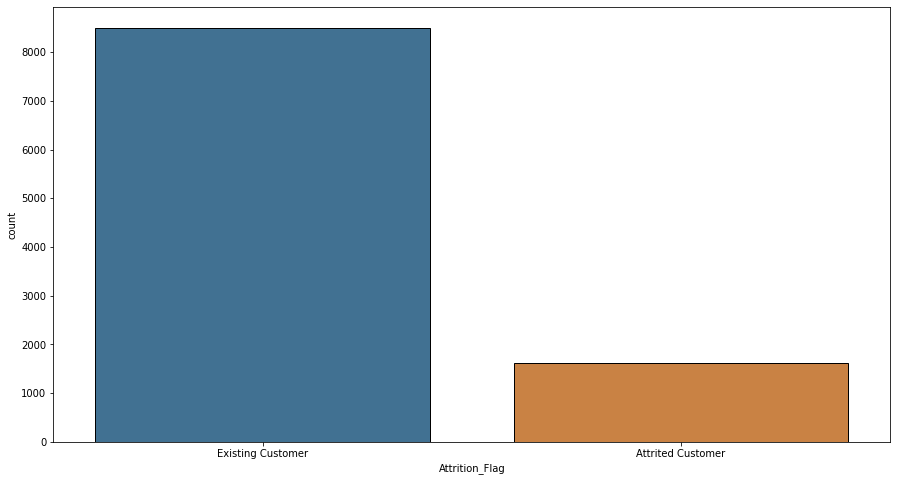

In [6]:
#Verileri Analiz Et
plt.figure(figsize = (15,8))
sns.countplot(x = veri['Attrition_Flag'], edgecolor = 'black', saturation = 0.55)
plt.show()

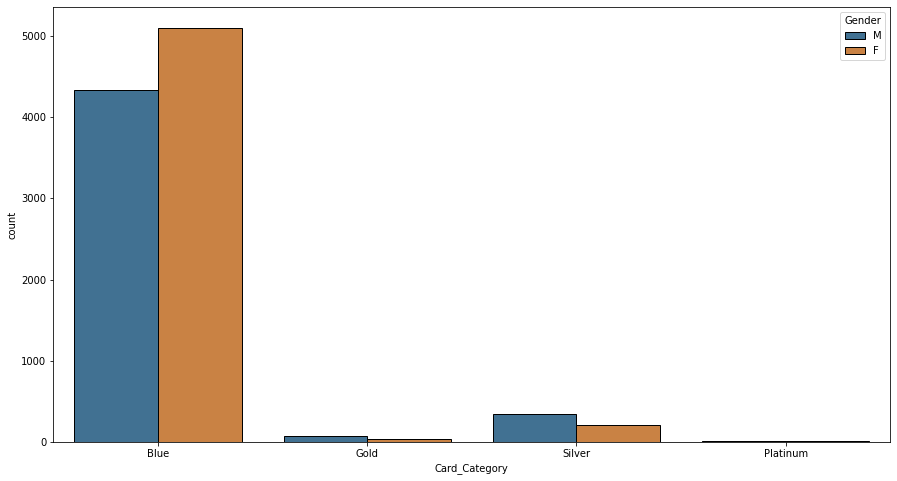

In [7]:
#Kart türü - Cinsiyet grafiği

plt.figure(figsize = (15, 8))
sns.countplot(x = veri['Card_Category'], hue = veri['Gender'], edgecolor = 'black', saturation = 0.55)
plt.show()

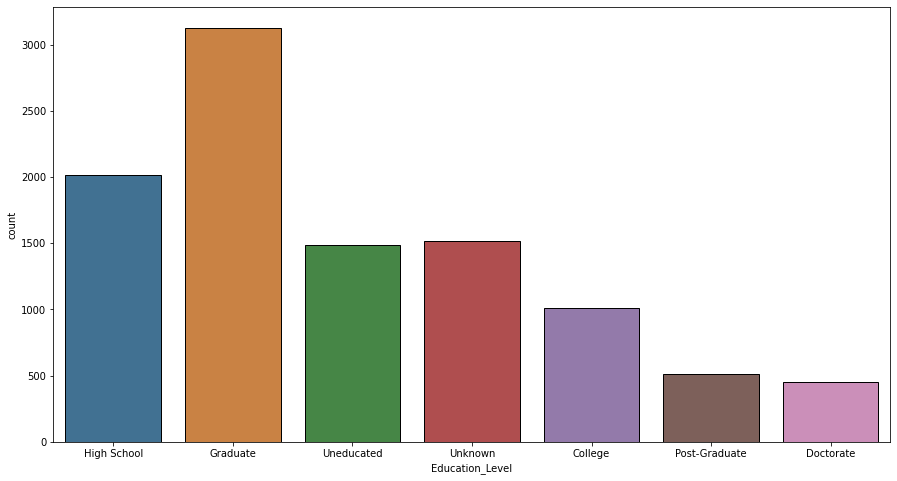

In [8]:
#Eğitim seviyelerine göre verilerin görselleştirilmesi
plt.figure(figsize = (15,8))
sns.countplot(x= veri['Education_Level'], edgecolor = 'black', saturation = 0.55)
plt.show()

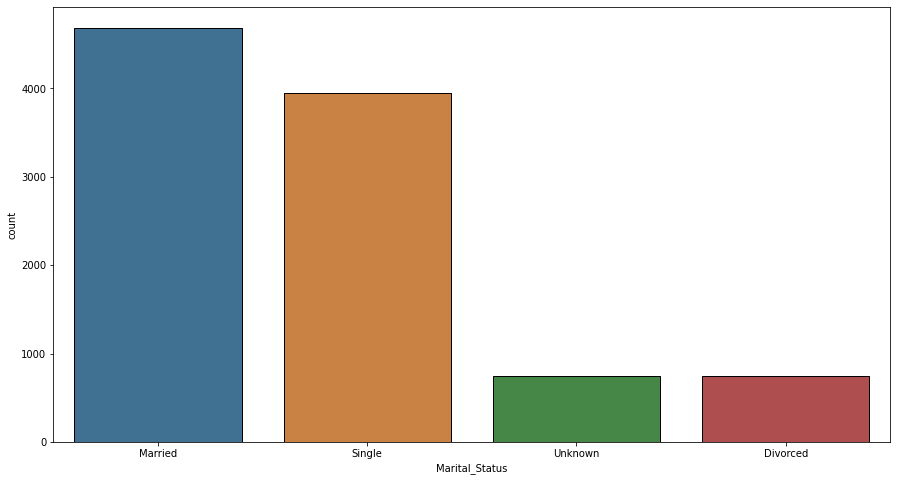

In [9]:
#Evlilik durumlarına göre verilerin görselleştirilmesi

plt.figure(figsize = (15,8))
sns.countplot(x = veri['Marital_Status'], edgecolor = 'black', saturation = 0.55)
plt.show()

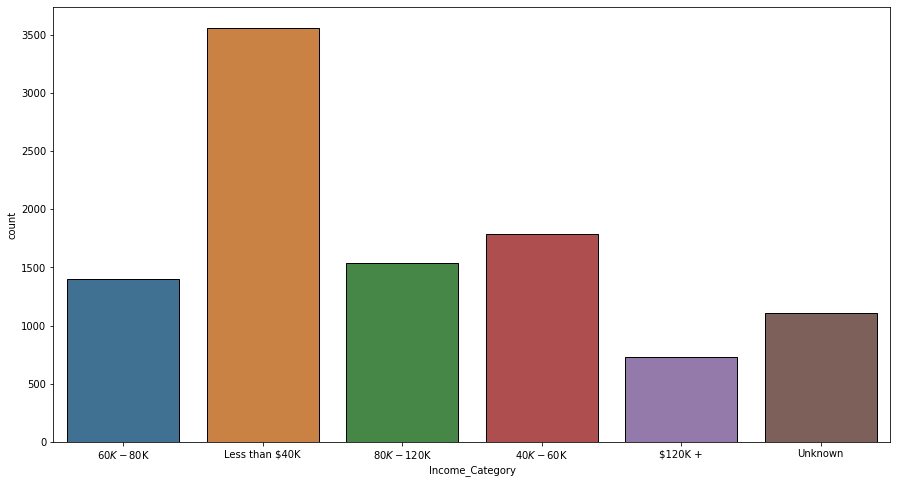

In [10]:
#Gelir durumuna göre sınıflandırma yapılması

plt.figure(figsize = (15,8))
sns.countplot(x = veri['Income_Category'], edgecolor = 'black', saturation = 0.55)
plt.show()

In [11]:
# Boşluk değere sahip olmayan sütunların varlığından emin olmak için sorgulama işlemi
veri.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
#Uniq değere sahip olmayan parametlerin tespiti ve 
veri.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [13]:
#CLIENTNUM is non unique has values so we can't take for train dataset
veri = veri.drop(["CLIENTNUM"],axis = 1)

In [14]:
lbe = LabelEncoder()
cat_cols = [x for x in veri.columns if veri[x].dtype == 'object']
for c in cat_cols:
    veri.loc[:, c] = lbe.fit_transform(veri.loc[:, c])

In [15]:
veri.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [16]:
#Attrition Flag i son koluma taşıdık
veri = veri[['Customer_Age', 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio', 'Attrition_Flag']]

In [17]:
veri.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [18]:
# CVS dosyasının yüklenmesi
def convert_to_list():
   
    dataset = list()

    # dataframe'in liste dönüştürülmesi
    dataset = veri.values.tolist()  
    return dataset

In [19]:
# String değerleri integera çevirme aşaması
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]

In [20]:
# Her sütunun min ve max değerlerini bulma kısmı  
def dataset_minmax(dataset):
    minmax = list()
    stats = [[min(column), max(column)] for column in zip(*dataset)]
    return stats

In [35]:
# Datasetteki sütun değerlerini 0-1 aralığında olacak şekilde ölçeklendirme
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [22]:
# k folds adedince verisetini bölme işlemi
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [23]:
# Programın doğruluk yüzdesini hesaplama
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [24]:
# Bir girdi için nöron aktivasyonunu hesaplama
def input_function(weights, inputs):
    matrix = weights[-1]
    for i in range(len(weights)-1):
        matrix += weights[i] * inputs[i]
    return matrix

In [25]:
# Transfer nöron aktivasyonu
def activation_function(matrix):
    return 1.0 / (1.0 + exp(-matrix))

In [26]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            matrix = input_function(neuron['weights'], inputs)
            neuron['output'] = activation_function(matrix)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [27]:
# Nöron çıktsının türevinin hesaplanması
def transfer_derivative(output):
    return output * (1.0 - output)

In [28]:
# Backpropagate hatası ve nöronlarda depolanması
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [29]:
# Ağ ağırlıklarını hatayla güncelleme
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [30]:
# Bir ağı sabit sayıda dönem için eğitin
def train_network(train, l_rate, n_epoch, n_hidden):
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = initialize_network(n_inputs, n_hidden, n_outputs)
    for epoch in range(n_epoch):
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
    return network

In [31]:
# Ağın başlatılması
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

In [32]:
# Ağı kullanarak tahmin işlemlerinin yapılması
def predict(network, test):
    predictions = list()
    for row in test:
        outputs = forward_propagate(network, row)
        prediction = outputs.index(max(outputs))
        predictions.append(prediction)
    return(predictions)

In [33]:
def train_split(folds):
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set, [])
    test_set = list()

In [34]:
#Verilerin yüklenmesi
dataset = convert_to_list()

# sınıf sütununu tam sayıya dönüştür
str_column_to_int(dataset, len(dataset[0])-1)

# girdi değişkenlerini normalleştirme
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

# algoritmanın hazırlanması
n_folds = 5
l_rate = 0.1
n_epoch = 50
n_hidden = 5

folds = cross_validation_split(dataset, n_folds)
scores = list()
for fold in folds:
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set, [])
    test_set = list()
    for row in fold:
        row_copy = list(row)
        test_set.append(row_copy)
        row_copy[-1] = None    
    network = train_network(train_set, l_rate, n_epoch, n_hidden)
    predicted = predict(network, test_set)
    actual = [row[-1] for row in fold]
    accuracy = accuracy_metric(actual, predicted)
    scores.append(accuracy)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [90.66666666666666, 90.27160493827161, 91.95061728395062, 90.41975308641975, 91.90123456790124]
Mean Accuracy: 91.042%
